In [1]:
import pandas as pd
import numpy as np
import statistics 
import random

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df = pd.read_excel("C2-t1.xlsx")

a1 = df.loc[:, ['访问时长(seconds)']]
a1 = a1.values
a2 = df.loc[:, ['活动要求学习时间(seconds)']]
a2 = a2.values

a = a1 -a2
df.loc[:, '高过门槛时长'] = a


user = df['USER ID'].unique()
user = list(user)
len(user)

user.remove(1237) 
user.remove(24213) 
user.remove(24539) 
user.remove(24589) 
user.remove(25093) 
user.remove(25094) 
user.remove(25145) 
user.remove(25174) 
user.remove(25185) 
user.remove(25197) 
user.remove(25216) 
user.remove(25232) 
user.remove(25234) 

#user.remove(24614) 
#user.remove(25231) 
#user.remove(1625)

rf = pd.read_excel("C2-t2.xlsx")
rf.set_index('USER ID', inplace=True)
rf = rf.reindex(user)

In [2]:
rf

,完成进度,累计时间(hours),学习次数,Percentile,结业考试成绩
USER ID,,,,,
24588,0.97,1.26,41,0.370,5.4
24617,1.00,0.42,43,0.259,8.1
24587,0.94,0.26,40,0.241,9.0
24770,0.94,0.44,46,0.278,18.0
8976,0.94,1.65,49,0.611,15.0
24638,0.94,0.47,41,0.296,6.3
24628,0.94,1.44,43,0.500,6.3
24615,0.94,1.00,35,0.333,16.8
24681,0.94,1.50,41,0.537,9.0


In [3]:
activities = df['活动名称'].unique()
activities = list(activities)
activities

['学习者非认知能力调查表',
 '如何看待人工智能',
 '人工智能的简要发展史',
 '人工智能盛宴下的隐忧',
 '人工智能的主要研究分支之一：推理',
 '什么是人工智能？',
 '学习体验问卷',
 '人工智能的主要研究分支之二：问题求解',
 '人工智能的主要研究分支之三：决策',
 '人工智能的主要研究分支之四：理解',
 '人工智能的主要研究分支之五：学习',
 '小结',
 '什么是专家系统？',
 'AI教育决策应用调查表',
 '什么是机器学习（1）',
 '什么是机器学习（2）',
 '什么是自然语言理解',
 '什么是模式识别',
 '计算机围棋程序AlphaGo',
 '拓展阅读：人工智能的春天真的来了吗？（选学）',
 '智能机器人（1）',
 '智能机器人（2）',
 '拓展阅读：机器擅长做什么？（选学）',
 '客观看待人工智能的新进展',
 '人工智能与认知科学',
 '自动驾驶（1）',
 '自动驾驶（2）',
 '结业小测试']

In [4]:
USER_ID = {}
for i in user:
     USER_ID[i] = df.loc[df['USER ID'] == i]


c1 = np.array([339, 1005, 233, 344, 221, 176, 155, 197, 344, 246, 437, 453, 235, 687, 198, 216, 161, 455, 445, 368])
c2 = np.array([9, 4])
c3 = np.array([53, 6, 3, 3, 3, 3, 3, 3])

c4 = ['什么是人工智能？', '人工智能的简要发展史', '人工智能的主要研究分支之一：推理', '人工智能的主要研究分支之二：问题求解', '人工智能的主要研究分支之三：决策', '人工智能的主要研究分支之四：理解', '人工智能的主要研究分支之五：学习', '小结', '什么是专家系统？', '什么是机器学习（1）', '什么是机器学习（2）', '什么是自然语言理解', '什么是模式识别', '计算机围棋程序AlphaGo', '智能机器人（1）', '智能机器人（2）', '自动驾驶（1）', '自动驾驶（2）', '人工智能与认知科学', '客观看待人工智能的新进展']

c5 = ['如何看待人工智能', '人工智能盛宴下的隐忧']

c6 = ['学习者非认知能力调查表', 'AI教育决策应用调查表','学习体验问卷']

In [5]:
C2_dictionary = {}

for k , i in zip(range(54), user): 
    C2_dictionary["LEARNER{0}".format(i)] = []
    
    USER_ID[i].reset_index(inplace=True)
    USER_ID[i].set_index('活动名称', inplace=True)

    Time_V = USER_ID[i].loc[c4, '访问时长(seconds)'].values    #视频观看时长
    Time_V = np.nan_to_num(Time_V)
    
    Time_T = USER_ID[i].loc[c5, '访问时长(seconds)'].values    #文本阅读时长
    Time_T = np.nan_to_num(Time_T)

    Time_H = USER_ID[i].loc[c6, '访问时长(seconds)'].values    #作业花费时长
    Time_H = np.nan_to_num(Time_H)

    Grit_V = Time_V / statistics.mean(c1)  #视频观看时长/视频总时长
    Grit_T = Time_T / statistics.mean(c2)   #文本阅读时长/文本页数
    Grit_H = Time_H / statistics.mean(c3)   #作业花费时长/作业问题数
    Grit1 = statistics.mean(Grit_V)    #(视频观看时长/视频总时长)的平均
    Grit2 = statistics.median(Grit_V)    #(视频观看时长/视频总时长)的中位数
    Grit3 = 1/statistics.stdev(Grit_V)    #(视频观看时长/视频总时长)的标准差的倒数
    Grit4 = 1/(max(Grit_V)-min(Grit_V))    #(视频观看时长/视频总时长)最大差距的倒数
    Grit5 = statistics.mean(Grit_T)    #(文本阅读时长/文本页数)的平均
    Grit6 = statistics.median(Grit_T)    #(文本阅读时长/文本页数)的中位数
    Grit7 = 1/statistics.stdev(Grit_T)    #(文本阅读时长/文本页数)的标准差的倒数
    Grit8 = 1/(max(Grit_T)-min(Grit_T))    #(文本阅读时长/文本页数)最大差距的倒数
    Grit9 = statistics.mean(Grit_H)    #(作业花费时长/作业问题数)的平均
    Grit10 = statistics.median(Grit_H)    #(作业花费时长/作业问题数)的中位数
    Grit11 = 1/statistics.stdev(Grit_H)    #(作业花费时长/作业问题数)的标准差的倒数
    Grit12 = 1/(max(Grit_H)-min(Grit_H))    #(作业花费时长/作业问题数)最大差距的倒数

    Self_control1 = Time_V[1] / 1005    #("最长视频"观看时长/视频总时长)
    Self_control2 = Time_T[0] / 9    #("最多页文本"阅读时长/文本页数)
    Self_control3 = Time_H[0] / 53    #("最多题作业"花费时长/作业问题数)

    Self_control4 = USER_ID[i].loc[:, '访问时长(seconds)'].values    #单一课件一次学习最长时长
    Self_control4 = np.nan_to_num(Self_control4)
    Self_control4 = Self_control4.max()

    Self_control5 = USER_ID[i].loc[:, '访问时长(seconds)'].values    #单一课件一次学习最短时长 
    Self_control5 = np.nan_to_num(Self_control5)
    Self_control5 = Self_control5.min()

    Self_control6 = USER_ID[i].loc[:, '访问时长(seconds)'].values    #平均登入時長
    Self_control6 = np.nan_to_num(Self_control6)
    Self_control6 = Self_control6.sum() 
    LOGIN = rf.iloc[k, 2]
    Self_control6 = Self_control6 / LOGIN

    Self_control7 = USER_ID[i].loc[:, '访问时长(seconds)'].values    #课程后半段学习时间
    Self_control7 = np.nan_to_num(Self_control7)
    Self_control7 = Self_control7[14:].mean()

    Engagement_V = Time_V    #视频观看时长
    Engagement_T = Time_T    #文本阅读时长
    Engagement_H = Time_H    #作业花费时长

    Engagement1 = USER_ID[i].loc[:, '访问时长(seconds)']    #学习总时长
    Engagement1 = np.nan_to_num(Engagement1).sum()
    Engagement2 = statistics.mean(Engagement_V)    #平均每次花费在视频学习的时间
    Engagement3 = statistics.mean(Engagement_T)    #平均每次花费在文本课件的时间
    Engagement4 = statistics.mean(Engagement_H)    #平均每次花费在作业答题的时间
    Engagement5 = LOGIN    #学习次数(登入次数)
    Engagement6 = rf.iloc[k, 4]    #结业考试成绩(30%)*

    Metacognitive_Self_regulation1 = Time_T[1]    #"课程回顾"花费时间
    Metacognitive_Self_regulation2 = random.randint(0, 1)    #是否重复阅读与观看 or 是否按照课程结构

    Self_perception1 = USER_ID[i].loc[:, '访问时长(seconds)'].values
    Self_perception1 = np.nan_to_num(Self_perception1)

    Self_perception1 = 1/((Self_perception1[:14].sum() 
                         - Self_perception1[14:].sum())**2)    
    #(学习历程前半段时长-学习历程后半段时长)的平方的倒数
    
    Self_perception2 = 1/((statistics.mean(Grit_V[:10]) 
                         - statistics.mean(Grit_V[10:]))**2)    
    #((视频观看时长/视频时长)前半段平均-(视频观看时长/视频时长)后半段平均)的平方的倒数
    
    Self_perception3 = 1/((Grit_T[0] - Grit_T[1])**2)    
    #((文本阅读时长/页数)前半段平均-(文本阅读时长/页数)后半段平均)的平方的倒数    
    
    Self_perception4 = 1/((Grit_H[0] - Grit_H[1])**2)    
    #((作业花费时长/页数)前半段平均-(作业花费时长/页数)后半段平均)的平方的倒数 


    Motivation1 = USER_ID[i].loc[:, ['高过门槛时长']].values
    Motivation1 = np.nan_to_num(Motivation1).sum()    #高过门槛时长总和

    Motivation2 = USER_ID[i].loc[c4, ['高过门槛时长']].values
    Motivation2 = np.nan_to_num(Motivation2).sum()

    Motivation3 = USER_ID[i].loc[c5, ['高过门槛时长']].values   
    Motivation3 = np.nan_to_num(Motivation3).sum()
                                       
    Motivation4 = np.array(USER_ID[i].loc[c4, ['高过门槛时长']].values).flatten()
    Motivation4 = np.nan_to_num(Motivation4)
    Motivation4 = statistics.mean(Motivation4 / c1)

    Motivation5 = np.array(USER_ID[i].loc[c5, ['高过门槛时长']].values).flatten()
    Motivation5 = np.nan_to_num(Motivation5)
    Motivation5 = statistics.mean(Motivation5 / c2)

    Motivation6 = random.randint(50, 100)

    Motivation7 = Motivation6 / (3+1)
    Motivation8 = Motivation7/Motivation5    #(选修花费/页数)的平均 / (文挡高过门槛时长/页数)的平均
    Motivation9 = rf.iloc[k, 0]    #完成进度*
    
    C2_dictionary["LEARNER{0}".format(i)].append([Grit1, 
                                             Grit2,
                                             Grit3,
                                             Grit4,
                                             Grit5,
                                             Grit6,
                                             Grit7,
                                             Grit8,
                                             Grit9,
                                             Grit10,
                                             Grit11,
                                             Grit12,
                                             Self_control1,
                                             Self_control2,
                                             Self_control3,
                                             Self_control4,
                                             Self_control5,
                                             Self_control6,
                                             Self_control7,
                                             Engagement1,
                                             Engagement2,
                                             Engagement3,
                                             Engagement4,
                                             Engagement5,
                                             Engagement6,
                                             Metacognitive_Self_regulation1,
                                             Metacognitive_Self_regulation2,
                                             Self_perception1,
                                             Self_perception2,
                                             Self_perception3,
                                             Self_perception4,
                                             Motivation1,
                                             Motivation2,
                                             Motivation3,
                                             Motivation4,
                                             Motivation5,
                                             Motivation6,
                                             Motivation7,
                                             Motivation8,
                                             Motivation9])


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice.
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in 

In [6]:
C2_dictionary.items()

dict_items([('LEARNER24588', [[0.5892753623188406, 0.5869565217391304, 3.536255233428969, 0.8098591549295775, 16.25, 16.25, 0.15427784316797402, 0.1090909090909091, 2.638888888888889, 1.2777777777777777, 0.2845338648384056, 0.0967741935483871, 0.006965174129353234, 13.88888888888889, 1.8679245283018868, 431, 4, 110.63414634146342, 158.16666666666666, 4536, 203, 97, 23, 41, 5.4, 70, 1, 7.457321747638266e-07, 24.4302181427082, 0.011900826446280993, 0.018595041322314047, 996, 886, -45, 0.2665054276359618, -5.972222222222222, 64, 16.0, -2.6790697674418604, 0.97]]), ('LEARNER24617', [[0.03826086956521739, 0.03913043478260869, 103.97167856026287, 28.75, 22.75, 22.75, 8.485281374238692, 6.000000000000085, 6.402777777777779, 1.6111111111111112, 0.08199073025727818, 0.028301886792452827, 0.01791044776119403, 15.11111111111111, 6.169811320754717, 342, 8, 35.2093023255814, 47.36842105263158, 1514, 13, 136, 57, 43, 8.1, 137, 0, 1.2225536701061176e-05, 13224.999999999985, 36.00000000000102, 0.00107

In [7]:
column_names = ['G1', 
                'G2', 
                'G3', 
                'G4', 
                'G5', 
                'G6', 
                'G7', 
                'G8', 
                'G9', 
                'G10', 
                'G11', 
                'G12', 
                'SC1', 
                'SC2', 
                'SC3', 
                'SC4', 
                'SC5', 
                'SC6', 
                'SC7', 
                'E1', 
                'E2', 
                'E3', 
                'E4', 
                'E5', 
                'E6', 
                'MSR1', 
                'MSR2', 
                'SP1', 
                'SP2', 
                'SP3', 
                'SP4', 
                'M1', 
                'M2', 
                'M3', 
                'M4', 
                'M5',
                'M6', 
                'M7', 
                'M8', 
                'M9']


df_Data_Point = pd.DataFrame(columns = column_names)

In [8]:
for i in user:
    a_series = pd.Series(C2_dictionary['LEARNER' + str(i)][0], index = df_Data_Point.columns)
    df_Data_Point = df_Data_Point.append(a_series, ignore_index=True)

In [9]:
df_Data_Point

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,0.589275,0.586957,3.536255,0.809859,16.250000,16.250000,0.154278,0.109091,2.638889,1.277778,0.284534,0.096774,0.006965,13.888889,1.867925,431.0,4.0,110.634146,158.166667,4536.0,203.00,97.0,23.00,41.0,5.4,70.0,1.0,7.457322e-07,24.430218,0.011901,0.018595,996.0,886.0,-45.0,0.266505,-5.972222,64.0,16.00,-2.679070,0.97
1,0.038261,0.039130,103.971679,28.750000,22.750000,22.750000,8.485281,6.000000,6.402778,1.611111,0.081991,0.028302,0.017910,15.111111,6.169811,342.0,8.0,35.209302,47.368421,1514.0,13.00,136.0,57.00,43.0,8.1,137.0,0.0,1.222554e-05,13225.000000,36.000000,0.001079,-2146.0,-2916.0,33.0,-0.413902,3.013889,68.0,17.00,5.640553,1.00
2,0.024203,0.020290,97.776485,26.538462,21.000000,21.000000,2.121320,1.500000,4.736111,3.166667,0.219991,0.073770,0.006965,14.222222,2.679245,163.0,5.0,23.075000,26.470588,923.0,8.00,126.0,42.00,40.0,9.0,124.0,0.0,1.890359e-03,146944.444444,2.250000,0.008609,-2497.0,-3013.0,12.0,-0.430857,0.944444,96.0,24.00,25.411765,0.94
3,0.063188,0.039130,9.522962,2.065868,21.416667,21.416667,2.828427,2.000000,7.736111,4.444444,0.108695,0.035714,0.014925,14.444444,1.811321,324.0,6.0,34.217391,59.352941,1574.0,21.00,128.0,69.00,46.0,18.0,127.0,0.0,5.072640e-06,1347.046175,4.000000,0.053254,-1846.0,-2744.0,17.0,-0.390673,1.430556,58.0,14.50,10.135922,0.94
4,0.698986,0.620290,1.552198,0.339567,20.916667,20.916667,2.828427,2.000000,7.208333,1.500000,0.066152,0.022843,1.010945,13.777778,7.547170,1016.0,6.0,121.061224,196.625000,5932.0,241.15,125.0,64.00,49.0,15.0,127.0,1.0,7.716049e-06,1214.416896,4.000000,0.000608,2752.0,1883.0,11.0,0.294775,1.097222,89.0,22.25,20.278481,0.94
5,0.146812,0.020290,4.248782,1.413934,21.000000,21.000000,4.242641,3.000000,4.597222,2.833333,0.252918,0.084906,0.006965,13.888889,2.358491,248.0,4.0,40.853659,75.000000,1675.0,50.00,126.0,41.00,41.0,6.3,127.0,0.0,1.306122e-06,16.989761,9.000000,0.016068,-1745.0,-2167.0,12.0,-0.277313,1.152778,83.0,20.75,18.000000,0.94
6,0.642754,0.553623,2.533250,0.569307,21.833333,21.833333,0.606092,0.428571,6.111111,4.277778,0.193088,0.066176,0.484577,13.777778,2.849057,621.0,15.0,120.953488,142.117647,5201.0,221.00,131.0,55.00,43.0,6.3,138.0,1.0,7.344247e-06,25.072622,0.183673,0.021768,1781.0,1255.0,22.0,0.312468,2.472222,99.0,24.75,10.011236,0.94
7,0.317536,0.292754,5.288557,1.157718,21.083333,21.083333,8.485281,6.000000,10.055556,2.111111,0.052973,0.018256,0.296517,14.111111,9.509434,504.0,7.0,103.057143,113.437500,3607.0,109.55,126.0,90.00,35.0,16.8,126.0,1.0,1.890359e-03,22500.000000,36.000000,0.000501,247.0,-929.0,13.0,-0.123016,1.138889,92.0,23.00,20.195122,0.94
8,0.670290,0.552174,1.934642,0.424354,24.666667,24.666667,0.184463,0.130435,5.472222,4.222222,0.217647,0.069767,0.934328,13.888889,2.698113,939.0,14.0,131.390244,162.411765,5387.0,231.00,148.0,49.00,41.0,9.0,171.0,1.0,5.486968e-05,267.345747,0.017013,0.012346,1967.0,1445.0,56.0,0.216867,6.652778,73.0,18.25,2.743215,0.94
9,0.594348,0.537681,3.684606,0.955679,22.833333,22.833333,0.530330,0.375000,2.902778,2.055556,0.330436,0.111111,0.482587,14.333333,1.622642,485.0,5.0,120.000000,164.058824,4920.0,205.00,137.0,26.00,41.0,21.9,145.0,0.0,2.309661e-06,1001.809612,0.140625,0.033736,1500.0,921.0,34.0,0.174876,3.625000,75.0,18.75,5.172414,0.94


In [10]:
df_Data_Point['USER_ID'] = user
df_Data_Point.set_index('USER_ID', inplace=True)

In [11]:
df_Data_Point

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.589275,0.586957,3.536255,0.809859,16.250000,16.250000,0.154278,0.109091,2.638889,1.277778,0.284534,0.096774,0.006965,13.888889,1.867925,431.0,4.0,110.634146,158.166667,4536.0,203.00,97.0,23.00,41.0,5.4,70.0,1.0,7.457322e-07,24.430218,0.011901,0.018595,996.0,886.0,-45.0,0.266505,-5.972222,64.0,16.00,-2.679070,0.97
24617,0.038261,0.039130,103.971679,28.750000,22.750000,22.750000,8.485281,6.000000,6.402778,1.611111,0.081991,0.028302,0.017910,15.111111,6.169811,342.0,8.0,35.209302,47.368421,1514.0,13.00,136.0,57.00,43.0,8.1,137.0,0.0,1.222554e-05,13225.000000,36.000000,0.001079,-2146.0,-2916.0,33.0,-0.413902,3.013889,68.0,17.00,5.640553,1.00
24587,0.024203,0.020290,97.776485,26.538462,21.000000,21.000000,2.121320,1.500000,4.736111,3.166667,0.219991,0.073770,0.006965,14.222222,2.679245,163.0,5.0,23.075000,26.470588,923.0,8.00,126.0,42.00,40.0,9.0,124.0,0.0,1.890359e-03,146944.444444,2.250000,0.008609,-2497.0,-3013.0,12.0,-0.430857,0.944444,96.0,24.00,25.411765,0.94
24770,0.063188,0.039130,9.522962,2.065868,21.416667,21.416667,2.828427,2.000000,7.736111,4.444444,0.108695,0.035714,0.014925,14.444444,1.811321,324.0,6.0,34.217391,59.352941,1574.0,21.00,128.0,69.00,46.0,18.0,127.0,0.0,5.072640e-06,1347.046175,4.000000,0.053254,-1846.0,-2744.0,17.0,-0.390673,1.430556,58.0,14.50,10.135922,0.94
8976,0.698986,0.620290,1.552198,0.339567,20.916667,20.916667,2.828427,2.000000,7.208333,1.500000,0.066152,0.022843,1.010945,13.777778,7.547170,1016.0,6.0,121.061224,196.625000,5932.0,241.15,125.0,64.00,49.0,15.0,127.0,1.0,7.716049e-06,1214.416896,4.000000,0.000608,2752.0,1883.0,11.0,0.294775,1.097222,89.0,22.25,20.278481,0.94
24638,0.146812,0.020290,4.248782,1.413934,21.000000,21.000000,4.242641,3.000000,4.597222,2.833333,0.252918,0.084906,0.006965,13.888889,2.358491,248.0,4.0,40.853659,75.000000,1675.0,50.00,126.0,41.00,41.0,6.3,127.0,0.0,1.306122e-06,16.989761,9.000000,0.016068,-1745.0,-2167.0,12.0,-0.277313,1.152778,83.0,20.75,18.000000,0.94
24628,0.642754,0.553623,2.533250,0.569307,21.833333,21.833333,0.606092,0.428571,6.111111,4.277778,0.193088,0.066176,0.484577,13.777778,2.849057,621.0,15.0,120.953488,142.117647,5201.0,221.00,131.0,55.00,43.0,6.3,138.0,1.0,7.344247e-06,25.072622,0.183673,0.021768,1781.0,1255.0,22.0,0.312468,2.472222,99.0,24.75,10.011236,0.94
24615,0.317536,0.292754,5.288557,1.157718,21.083333,21.083333,8.485281,6.000000,10.055556,2.111111,0.052973,0.018256,0.296517,14.111111,9.509434,504.0,7.0,103.057143,113.437500,3607.0,109.55,126.0,90.00,35.0,16.8,126.0,1.0,1.890359e-03,22500.000000,36.000000,0.000501,247.0,-929.0,13.0,-0.123016,1.138889,92.0,23.00,20.195122,0.94
24681,0.670290,0.552174,1.934642,0.424354,24.666667,24.666667,0.184463,0.130435,5.472222,4.222222,0.217647,0.069767,0.934328,13.888889,2.698113,939.0,14.0,131.390244,162.411765,5387.0,231.00,148.0,49.00,41.0,9.0,171.0,1.0,5.486968e-05,267.345747,0.017013,0.012346,1967.0,1445.0,56.0,0.216867,6.652778,73.0,18.25,2.743215,0.94


In [12]:
df_Data_Point.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000
mean,1.110449,0.741145,6.775029,1.801447,23.831301,23.831301,1.452659,1.027185,15.582704,3.735772,0.122079,0.042429,1.099527,16.018970,15.924068,1619.780488,14.512195,215.231104,271.958371,9319.414634,382.764634,142.743902,139.847561,42.780488,13.543902,141.804878,0.414634,1.118229e-04,7253.037225,3.496698,0.022209,6064.780488,4665.024390,51.829268,0.736876,4.800136,73.97561,18.493902,8.675552,0.917561
std,0.731139,0.471213,21.660325,5.944974,5.973044,5.973044,2.237243,1.581970,11.889889,1.642970,0.146691,0.050056,1.024456,5.907042,15.391529,1522.113802,9.176388,131.060701,170.633951,5867.235865,252.187172,35.916417,106.883945,7.464959,5.858671,54.315845,0.498779,4.109259e-04,26249.387357,9.414164,0.065623,5837.329323,5030.501578,76.502909,0.767386,6.820767,15.18303,3.795757,14.438415,0.130130
min,0.024203,0.000000,0.186254,0.043434,5.916667,5.916667,0.018773,0.013274,2.222222,1.277778,0.012039,0.004215,0.000000,7.333333,0.358491,163.000000,2.000000,23.075000,26.470588,923.000000,8.000000,35.000000,20.000000,15.000000,0.000000,0.000000,0.000000,4.031754e-09,0.095311,0.000176,0.000019,-2497.000000,-3013.000000,-169.000000,-0.430857,-17.375000,51.00000,12.750000,-2.679070,0.270000
25%,0.582029,0.537681,0.677357,0.187296,21.416667,21.416667,0.235702,0.166667,4.736111,2.388889,0.027400,0.009534,0.488557,14.111111,2.698113,514.000000,7.000000,120.953488,149.455882,4868.000000,200.800000,128.000000,42.000000,41.000000,9.000000,127.000000,0.000000,2.629849e-07,4.463400,0.027778,0.000097,1476.000000,956.000000,17.000000,0.191784,1.597222,64.00000,16.000000,1.972112,0.940000
50%,0.702029,0.589855,1.406445,0.339567,22.916667,22.916667,0.353553,0.250000,12.916667,3.888889,0.049277,0.017241,1.010945,14.777778,9.849057,1024.000000,12.000000,215.000000,217.529412,5932.000000,242.000000,137.000000,116.000000,44.000000,15.000000,136.000000,0.000000,2.661209e-06,23.611387,0.062500,0.000501,2919.000000,1952.000000,35.000000,0.376586,3.013889,69.00000,17.250000,4.882979,0.940000
75%,1.901304,1.089855,3.245032,0.809859,26.666667,26.666667,1.697056,1.200000,18.763889,4.666667,0.193088,0.066176,1.141294,16.333333,18.207547,2156.000000,22.000000,321.098039,370.514706,16293.000000,655.000000,160.000000,168.000000,47.000000,18.300000,174.000000,1.000000,2.029056e-05,476.786573,1.440000,0.012346,12873.000000,9939.000000,80.000000,1.550032,8.305556,89.00000,22.250000,8.369427,0.940000
max,2.458406,1.486957,103.971679,28.750000,45.333333,45.333333,8.485281,6.000000,34.527778,10.055556,0.665169,0.225000,4.909453,50.222222,40.735849,7943.000000,47.000000,604.178571,695.941176,20061.000000,848.000000,272.000000,310.000000,52.000000,22.500000,324.000000,1.000000,1.890359e-03,146944.444444,36.000000,0.360000,16641.000000,14305.000000,332.000000,2.060735,31.055556,100.00000,25.000000,86.400000,1.000000


In [13]:
# Normalization of Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df_Data_Point_scaled = scaler.fit_transform(df_Data_Point) # it becomes an array
df_Data_Point_scaled_noNaN = np.nan_to_num(df_Data_Point_scaled)

# make it a dataframe
df_Data_Point_scaled_noNaN = pd.DataFrame(df_Data_Point_scaled_noNaN, index = df_Data_Point.index, 
                                          columns = df_Data_Point.columns)

In [14]:
df_Data_Point_scaled_noNaN

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.232139,0.394737,0.032278,0.026699,0.262156,0.262156,0.016005,0.016005,0.012898,0.000000,0.417213,0.419227,0.001419,0.152850,0.037383,0.034447,0.044444,0.150677,0.196717,0.188787,0.232143,0.261603,0.010345,0.702703,0.240000,0.216049,1.0,0.000392,0.000166,0.000326,5.160300e-02,0.182516,0.225141,0.247505,0.279886,0.235446,0.265306,0.265306,0.000000,0.958904
24617,0.005775,0.026316,1.000000,1.000000,0.427061,0.427061,1.000000,1.000000,0.129407,0.037975,0.107102,0.109095,0.003648,0.181347,0.143925,0.023008,0.133333,0.020881,0.031215,0.030881,0.005952,0.426160,0.127586,0.756757,0.360000,0.422840,0.0,0.006465,0.089999,1.000000,2.944506e-03,0.018340,0.005601,0.403194,0.006805,0.420992,0.346939,0.346939,0.093396,1.000000
24587,0.000000,0.013645,0.940308,0.922961,0.382664,0.382664,0.248337,0.248337,0.077816,0.215190,0.318392,0.315036,0.001419,0.160622,0.057477,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.383966,0.075862,0.675676,0.400000,0.382716,0.0,1.000000,1.000000,0.062495,2.386192e-02,0.000000,0.000000,0.361277,0.000000,0.378262,0.918367,0.918367,0.315347,0.917808
24770,0.016016,0.026316,0.089962,0.070452,0.393235,0.393235,0.331855,0.331855,0.170679,0.360759,0.147988,0.142668,0.003040,0.165803,0.035981,0.020694,0.088889,0.019175,0.049117,0.034016,0.015476,0.392405,0.168966,0.837838,0.800000,0.391975,0.0,0.002681,0.009166,0.111107,1.478842e-01,0.034016,0.015533,0.371257,0.016128,0.388299,0.142857,0.142857,0.143861,0.917808
8976,0.277209,0.417154,0.013161,0.010316,0.380550,0.380550,0.331855,0.331855,0.154342,0.025316,0.082851,0.084368,0.205918,0.150259,0.178037,0.109640,0.088889,0.168621,0.254163,0.261731,0.277560,0.379747,0.151724,0.918919,0.666667,0.391975,1.0,0.004080,0.008264,0.111107,1.636347e-03,0.274271,0.282712,0.359281,0.291232,0.381417,0.775510,0.775510,0.257721,0.917808
24638,0.050369,0.013645,0.039144,0.047742,0.382664,0.382664,0.498891,0.498891,0.073517,0.177215,0.368807,0.365470,0.001419,0.152850,0.049533,0.010925,0.044444,0.030595,0.072489,0.039294,0.050000,0.383966,0.072414,0.702703,0.280000,0.391975,0.0,0.000689,0.000115,0.249996,4.458374e-02,0.039294,0.048851,0.361277,0.061625,0.382564,0.653061,0.653061,0.232143,0.917808
24628,0.254108,0.372320,0.022614,0.018319,0.403805,0.403805,0.069370,0.069370,0.120378,0.341772,0.277202,0.280640,0.098703,0.150259,0.061682,0.058869,0.288889,0.168436,0.172744,0.223534,0.253571,0.405063,0.120690,0.756757,0.280000,0.425926,1.0,0.003883,0.000170,0.005097,6.041818e-02,0.223534,0.246449,0.381238,0.298333,0.409808,0.979592,0.979592,0.142461,0.917808
24615,0.120505,0.196881,0.049162,0.038816,0.384778,0.384778,1.000000,1.000000,0.242476,0.094937,0.062673,0.063592,0.060397,0.158031,0.226636,0.043830,0.111111,0.137638,0.129904,0.140245,0.120893,0.383966,0.241379,0.540541,0.746667,0.388889,1.0,1.000000,0.153119,1.000000,1.339751e-03,0.143380,0.120337,0.363273,0.123552,0.382277,0.836735,0.836735,0.256785,0.917808
24681,0.265420,0.371345,0.016846,0.013269,0.475687,0.475687,0.019570,0.019570,0.100602,0.335443,0.314804,0.296905,0.190312,0.152850,0.057944,0.099743,0.266667,0.186396,0.203058,0.233253,0.265476,0.476793,0.100000,0.702703,0.400000,0.527778,1.0,0.029024,0.001819,0.000468,3.424274e-02,0.233253,0.257420,0.449102,0.259964,0.496128,0.448980,0.448980,0.060870,0.917808


In [15]:
df_Data_Point_scaled_noNaN.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.446243,0.498431,0.063485,0.061241,0.454494,0.454494,0.169360,0.169360,0.413566,0.280025,0.168480,0.173081,0.223961,0.202515,0.385503,0.187247,0.278049,0.330674,0.357746,0.438730,0.446148,0.454616,0.413267,0.750824,0.601951,0.437669,0.414634,0.059152,0.049358,0.097126,0.061642,0.447371,0.443355,0.440777,0.468669,0.457875,0.468890,0.468890,0.127467,0.887070
std,0.300361,0.316897,0.208703,0.207095,0.151536,0.151536,0.264246,0.264246,0.368045,0.187174,0.224597,0.226718,0.208670,0.137729,0.381192,0.195644,0.203920,0.225538,0.258106,0.306575,0.300223,0.151546,0.368565,0.201756,0.260385,0.167641,0.498779,0.217380,0.178635,0.261506,0.182295,0.305013,0.290478,0.152700,0.307990,0.140836,0.309858,0.309858,0.162085,0.178261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229162,0.361598,0.004732,0.005011,0.393235,0.393235,0.025622,0.025622,0.077816,0.126582,0.023519,0.024089,0.099514,0.158031,0.057944,0.045116,0.111111,0.168436,0.178895,0.206134,0.229524,0.392405,0.075862,0.702703,0.400000,0.391975,0.000000,0.000137,0.000030,0.000767,0.000216,0.207597,0.229184,0.371257,0.249897,0.391741,0.265306,0.265306,0.052214,0.917808
50%,0.278459,0.396686,0.011757,0.010316,0.431290,0.431290,0.039542,0.039542,0.331040,0.297468,0.057014,0.058998,0.205918,0.173575,0.235047,0.110668,0.222222,0.330277,0.284949,0.261731,0.278571,0.430380,0.331034,0.783784,0.666667,0.419753,0.000000,0.001406,0.000160,0.001731,0.001340,0.282997,0.286696,0.407186,0.324067,0.420992,0.367347,0.367347,0.084891,0.917808
75%,0.771136,0.732943,0.029472,0.026699,0.526427,0.526427,0.198226,0.198226,0.512038,0.386076,0.277202,0.280640,0.232469,0.209845,0.442056,0.256170,0.444444,0.512857,0.499692,0.803114,0.770238,0.527426,0.510345,0.864865,0.813333,0.537037,1.000000,0.010732,0.003244,0.039995,0.034243,0.803114,0.747892,0.497006,0.795029,0.530255,0.775510,0.775510,0.124030,0.917808
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
e = df_Data_Point_scaled_noNaN.corr()
sns.heatmap(e)

In [17]:
from __future__ import print_function
import sys
import numpy
numpy.set_printoptions(linewidth=1000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Do the PCA.

n=5
pca = PCA(n_components=n)
pct = pca.fit_transform(df_Data_Point_scaled_noNaN)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df_Data_Point_scaled_noNaN['PC' + str(i + 1)] = pct[:, i]

display(df_Data_Point_scaled_noNaN.head())

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3,PC4,PC5
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.232139,0.394737,0.032278,0.026699,0.262156,0.262156,0.016005,0.016005,0.012898,0.000000,0.417213,0.419227,0.001419,0.152850,0.037383,0.034447,0.044444,0.150677,0.196717,0.188787,0.232143,0.261603,0.010345,0.702703,0.240000,0.216049,1.0,0.000392,0.000166,0.000326,0.051603,0.182516,0.225141,0.247505,0.279886,0.235446,0.265306,0.265306,0.000000,0.958904,-0.958337,0.513691,-0.531528,0.043481,-0.366465
24617,0.005775,0.026316,1.000000,1.000000,0.427061,0.427061,1.000000,1.000000,0.129407,0.037975,0.107102,0.109095,0.003648,0.181347,0.143925,0.023008,0.133333,0.020881,0.031215,0.030881,0.005952,0.426160,0.127586,0.756757,0.360000,0.422840,0.0,0.006465,0.089999,1.000000,0.002945,0.018340,0.005601,0.403194,0.006805,0.420992,0.346939,0.346939,0.093396,1.000000,-1.607627,-1.103675,1.053579,0.688546,-0.171316
24587,0.000000,0.013645,0.940308,0.922961,0.382664,0.382664,0.248337,0.248337,0.077816,0.215190,0.318392,0.315036,0.001419,0.160622,0.057477,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.383966,0.075862,0.675676,0.400000,0.382716,0.0,1.000000,1.000000,0.062495,0.023862,0.000000,0.000000,0.361277,0.000000,0.378262,0.918367,0.918367,0.315347,0.917808,-1.732625,-0.375948,0.653403,0.061342,0.065193
24770,0.016016,0.026316,0.089962,0.070452,0.393235,0.393235,0.331855,0.331855,0.170679,0.360759,0.147988,0.142668,0.003040,0.165803,0.035981,0.020694,0.088889,0.019175,0.049117,0.034016,0.015476,0.392405,0.168966,0.837838,0.800000,0.391975,0.0,0.002681,0.009166,0.111107,0.147884,0.034016,0.015533,0.371257,0.016128,0.388299,0.142857,0.142857,0.143861,0.917808,-1.175269,-0.711948,-0.297162,0.132272,-0.323835
8976,0.277209,0.417154,0.013161,0.010316,0.380550,0.380550,0.331855,0.331855,0.154342,0.025316,0.082851,0.084368,0.205918,0.150259,0.178037,0.109640,0.088889,0.168621,0.254163,0.261731,0.277560,0.379747,0.151724,0.918919,0.666667,0.391975,1.0,0.004080,0.008264,0.111107,0.001636,0.274271,0.282712,0.359281,0.291232,0.381417,0.775510,0.775510,0.257721,0.917808,-0.693949,0.567264,0.275622,0.028756,0.046464


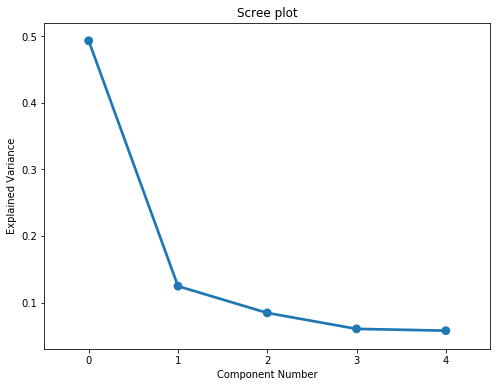

In [18]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


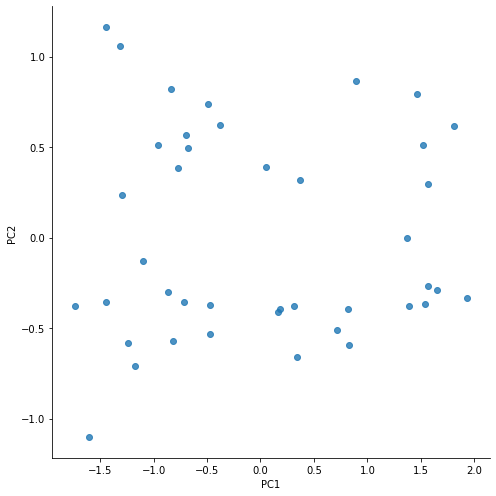

In [19]:
g = sns.lmplot('PC1',
               'PC2',
               data=df_Data_Point_scaled_noNaN,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [20]:
df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.drop(columns =['PC3', 'PC4', 'PC5']) 

In [21]:
df_Data_Point_scaled_noNaN_0 = df_Data_Point_scaled_noNaN.drop(columns =['PC1', 'PC2'], inplace = False) 
df_Data_Point_scaled_noNaN_0.head()
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.232139,0.394737,0.032278,0.026699,0.262156,0.262156,0.016005,0.016005,0.012898,0.000000,0.417213,0.419227,0.001419,0.152850,0.037383,0.034447,0.044444,0.150677,0.196717,0.188787,0.232143,0.261603,0.010345,0.702703,0.240000,0.216049,1.0,0.000392,0.000166,0.000326,0.051603,0.182516,0.225141,0.247505,0.279886,0.235446,0.265306,0.265306,0.000000,0.958904,-0.958337,0.513691
24617,0.005775,0.026316,1.000000,1.000000,0.427061,0.427061,1.000000,1.000000,0.129407,0.037975,0.107102,0.109095,0.003648,0.181347,0.143925,0.023008,0.133333,0.020881,0.031215,0.030881,0.005952,0.426160,0.127586,0.756757,0.360000,0.422840,0.0,0.006465,0.089999,1.000000,0.002945,0.018340,0.005601,0.403194,0.006805,0.420992,0.346939,0.346939,0.093396,1.000000,-1.607627,-1.103675
24587,0.000000,0.013645,0.940308,0.922961,0.382664,0.382664,0.248337,0.248337,0.077816,0.215190,0.318392,0.315036,0.001419,0.160622,0.057477,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.383966,0.075862,0.675676,0.400000,0.382716,0.0,1.000000,1.000000,0.062495,0.023862,0.000000,0.000000,0.361277,0.000000,0.378262,0.918367,0.918367,0.315347,0.917808,-1.732625,-0.375948
24770,0.016016,0.026316,0.089962,0.070452,0.393235,0.393235,0.331855,0.331855,0.170679,0.360759,0.147988,0.142668,0.003040,0.165803,0.035981,0.020694,0.088889,0.019175,0.049117,0.034016,0.015476,0.392405,0.168966,0.837838,0.800000,0.391975,0.0,0.002681,0.009166,0.111107,0.147884,0.034016,0.015533,0.371257,0.016128,0.388299,0.142857,0.142857,0.143861,0.917808,-1.175269,-0.711948
8976,0.277209,0.417154,0.013161,0.010316,0.380550,0.380550,0.331855,0.331855,0.154342,0.025316,0.082851,0.084368,0.205918,0.150259,0.178037,0.109640,0.088889,0.168621,0.254163,0.261731,0.277560,0.379747,0.151724,0.918919,0.666667,0.391975,1.0,0.004080,0.008264,0.111107,0.001636,0.274271,0.282712,0.359281,0.291232,0.381417,0.775510,0.775510,0.257721,0.917808,-0.693949,0.567264


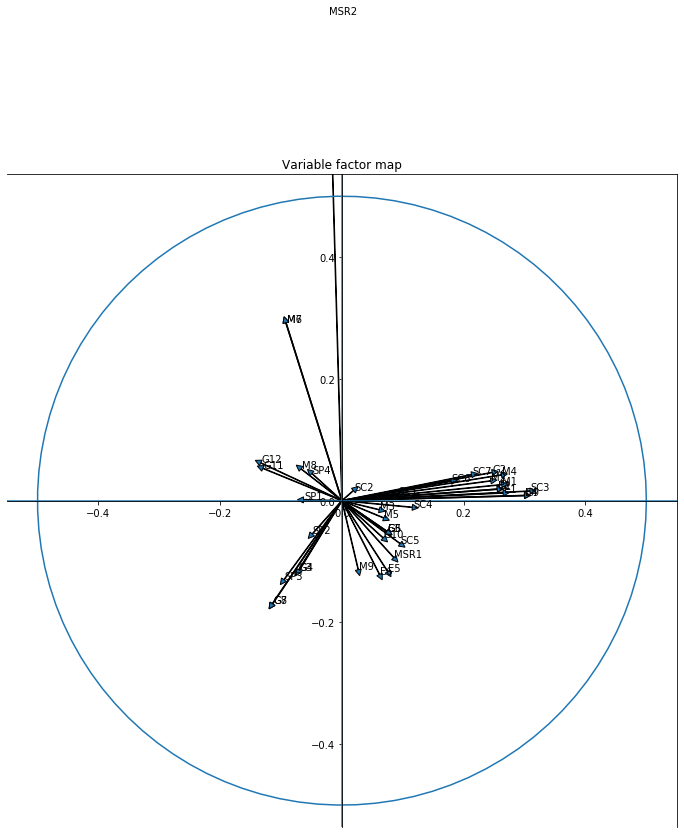

In [22]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] + 0.001,
             pca.components_[1, i] + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

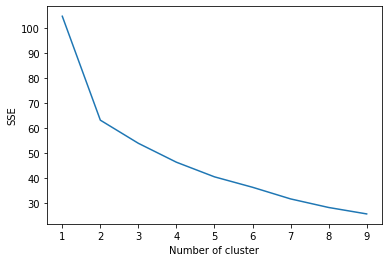

In [23]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Data_Point_scaled_noNaN_0)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

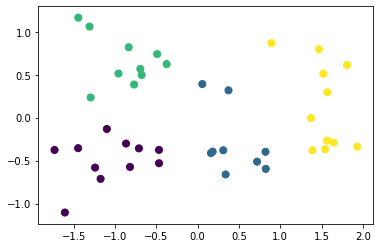

In [24]:
df_Data_Point_scaled_noNaN_2 = df_Data_Point_scaled_noNaN[['PC1','PC2']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_Data_Point_scaled_noNaN_2)
y_kmeans = kmeans.predict(df_Data_Point_scaled_noNaN_2)

x = df_Data_Point_scaled_noNaN_2['PC1'].astype('float32')
y = df_Data_Point_scaled_noNaN_2['PC2'].astype('float32')
c = y_kmeans.astype('float32')

plt.scatter(x, y, c=c, s=50, cmap='viridis')

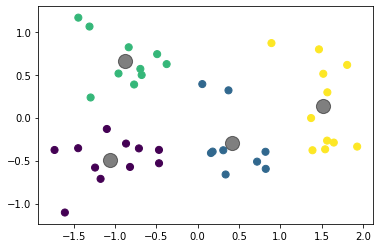

In [25]:
plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

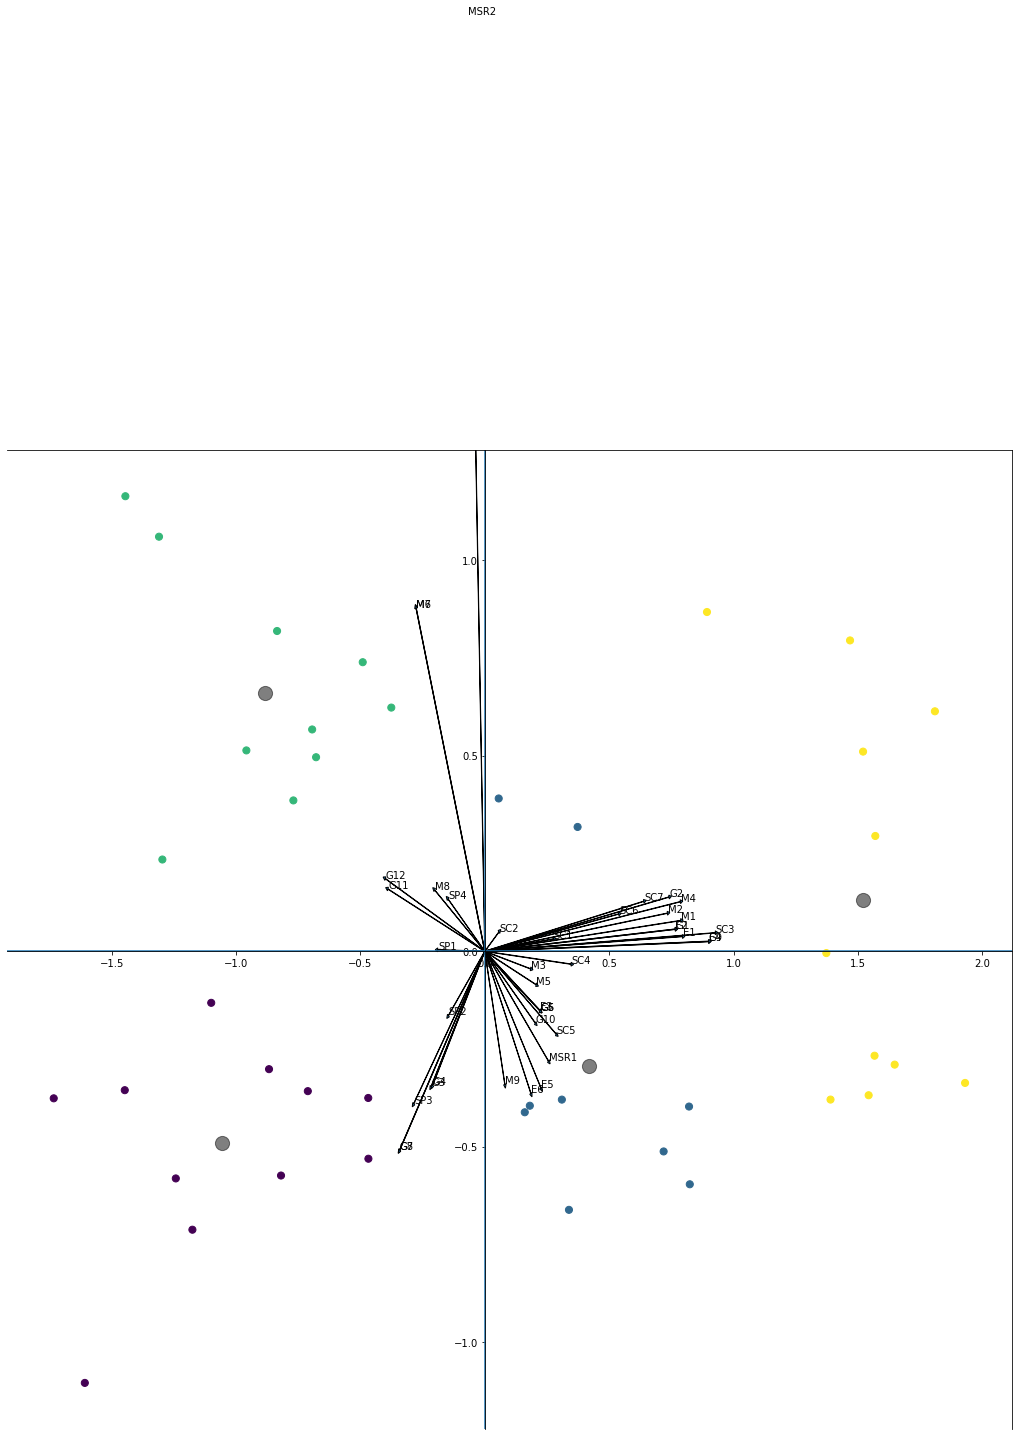

In [26]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(18, 18))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i] * 3,  #0 for PC1
             pca.components_[1, i] * 3,  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] * 3 + 0.001,
             pca.components_[1, i] * 3 + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


plt.show()

In [27]:
df_Data_Point_scaled_noNaN['cluster'] = y_kmeans
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,cluster
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.232139,0.394737,0.032278,0.026699,0.262156,0.262156,0.016005,0.016005,0.012898,0.000000,0.417213,0.419227,0.001419,0.152850,0.037383,0.034447,0.044444,0.150677,0.196717,0.188787,0.232143,0.261603,0.010345,0.702703,0.240000,0.216049,1.0,0.000392,0.000166,0.000326,0.051603,0.182516,0.225141,0.247505,0.279886,0.235446,0.265306,0.265306,0.000000,0.958904,-0.958337,0.513691,2
24617,0.005775,0.026316,1.000000,1.000000,0.427061,0.427061,1.000000,1.000000,0.129407,0.037975,0.107102,0.109095,0.003648,0.181347,0.143925,0.023008,0.133333,0.020881,0.031215,0.030881,0.005952,0.426160,0.127586,0.756757,0.360000,0.422840,0.0,0.006465,0.089999,1.000000,0.002945,0.018340,0.005601,0.403194,0.006805,0.420992,0.346939,0.346939,0.093396,1.000000,-1.607627,-1.103675,0
24587,0.000000,0.013645,0.940308,0.922961,0.382664,0.382664,0.248337,0.248337,0.077816,0.215190,0.318392,0.315036,0.001419,0.160622,0.057477,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.383966,0.075862,0.675676,0.400000,0.382716,0.0,1.000000,1.000000,0.062495,0.023862,0.000000,0.000000,0.361277,0.000000,0.378262,0.918367,0.918367,0.315347,0.917808,-1.732625,-0.375948,0
24770,0.016016,0.026316,0.089962,0.070452,0.393235,0.393235,0.331855,0.331855,0.170679,0.360759,0.147988,0.142668,0.003040,0.165803,0.035981,0.020694,0.088889,0.019175,0.049117,0.034016,0.015476,0.392405,0.168966,0.837838,0.800000,0.391975,0.0,0.002681,0.009166,0.111107,0.147884,0.034016,0.015533,0.371257,0.016128,0.388299,0.142857,0.142857,0.143861,0.917808,-1.175269,-0.711948,0
8976,0.277209,0.417154,0.013161,0.010316,0.380550,0.380550,0.331855,0.331855,0.154342,0.025316,0.082851,0.084368,0.205918,0.150259,0.178037,0.109640,0.088889,0.168621,0.254163,0.261731,0.277560,0.379747,0.151724,0.918919,0.666667,0.391975,1.0,0.004080,0.008264,0.111107,0.001636,0.274271,0.282712,0.359281,0.291232,0.381417,0.775510,0.775510,0.257721,0.917808,-0.693949,0.567264,2


In [28]:
cluster_1 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 0]
cluster_2 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 1]
cluster_3 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 2]
cluster_4 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 3]

In [29]:
mean_cluster_1 = cluster_1.mean() 
mean_cluster_2 = cluster_2.mean() 
mean_cluster_3 = cluster_3.mean() 
mean_cluster_4 = cluster_4.mean() 

In [30]:
list_mean_cluster_1 = mean_cluster_1.tolist() 
list_mean_cluster_2 = mean_cluster_2.tolist() 
list_mean_cluster_3 = mean_cluster_3.tolist()
list_mean_cluster_4 = mean_cluster_4.tolist()

G = []
SC = []
E = []
MSR = []
SP = []
M = []

for i in range(4):
    XYZ1 = eval('list_mean_cluster_'+str(i+1))
    XYZ1 = XYZ1[:12]
    G.append(statistics.mean(XYZ1))
    XYZ2 = eval('list_mean_cluster_'+str(i+1))
    XYZ2 = XYZ2[12:19]
    SC.append(statistics.mean(XYZ2))
    XYZ3 = eval('list_mean_cluster_'+str(i+1))
    XYZ3 = XYZ3[19:25]
    E.append(statistics.mean(XYZ3))
    XYZ4 = eval('list_mean_cluster_'+str(i+1))
    XYZ4 = XYZ4[25:27]
    MSR.append(statistics.mean(XYZ4))
    XYZ5 = eval('list_mean_cluster_'+str(i+1))
    XYZ5 = XYZ5[27:31]
    SP.append(statistics.mean(XYZ5))
    XYZ6 = eval('list_mean_cluster_'+str(i+1))
    XYZ6 = XYZ6[31:40]
    M.append(statistics.mean(XYZ6))


In [31]:
print(G)
print(SC)
print(E)
print(MSR)
print(SP)
print(M)

[0.2802790602020619, 0.2715806146510369, 0.20776753918114768, 0.34987093387703755]
[0.1215144573290976, 0.33920404470045307, 0.15853618098942848, 0.5034996556495367]
[0.352862951688402, 0.6159590409915877, 0.32858104396445387, 0.7736575341070631]
[0.19991582491582485, 0.37071330589849105, 0.6455246913580247, 0.4983164983164984]
[0.15228498202246876, 0.012662088056081992, 0.09249013334218106, 0.0023283390700693167]
[0.36649641057388904, 0.46834078025073866, 0.42710397072790107, 0.6057252524622327]


In [32]:
Learners = {}
for i in range(4):
    Learners['Persona'+str(i+1)] = [G[i], SC[i], E[i], MSR[i], SP[i], M[i]]

Learners

{'Persona1': [0.2802790602020619,
  0.1215144573290976,
  0.352862951688402,
  0.19991582491582485,
  0.15228498202246876,
  0.36649641057388904],
 'Persona2': [0.2715806146510369,
  0.33920404470045307,
  0.6159590409915877,
  0.37071330589849105,
  0.012662088056081992,
  0.46834078025073866],
 'Persona3': [0.20776753918114768,
  0.15853618098942848,
  0.32858104396445387,
  0.6455246913580247,
  0.09249013334218106,
  0.42710397072790107],
 'Persona4': [0.34987093387703755,
  0.5034996556495367,
  0.7736575341070631,
  0.4983164983164984,
  0.0023283390700693167,
  0.6057252524622327]}

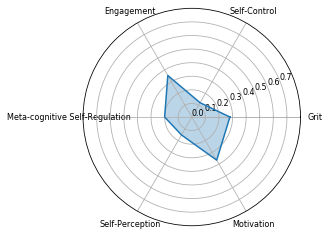

In [33]:
from math import pi

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]


Learners['Persona1'] += Learners['Persona1'][:1]
angles0 += angles0[:1]

plt.polar(angles0, Learners['Persona1'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona1'], alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))


plt.show()

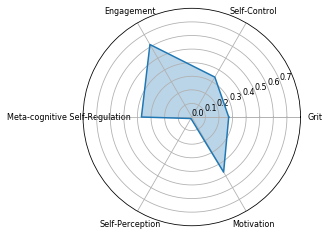

In [34]:
Learners['Persona2'] += Learners['Persona2'][:1]

plt.polar(angles0, Learners['Persona2'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona2'], alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))

plt.show()

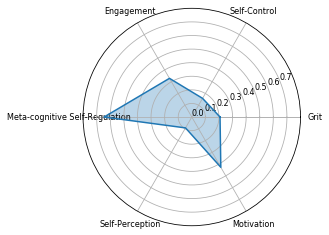

In [35]:
Learners['Persona3'] += Learners['Persona3'][:1]

plt.polar(angles0, Learners['Persona3'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona3'], alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))

plt.show()

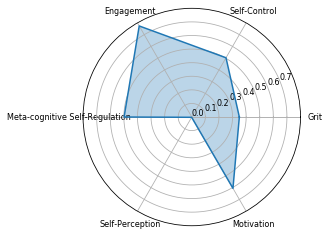

In [36]:
Learners['Persona4'] += Learners['Persona4'][:1]

plt.polar(angles0, Learners['Persona4'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona4'], alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))

plt.show()

In [37]:
# Rearrange the columns' order according to factor analyisi

columnsTitles = ['PC1', 'PC2', 'cluster',
                 'G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4', 
                 'SC2', 'SC5', 'MSR1', 'M9', 
                 'G5', 'G11', 'E3', 'SP4', 'M3', 'M5', 
                 'G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8', 
                 'E5', 'E6', 'M6', 'M7', 
                 'G9', 'G12', 'SP3']

arrange_df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.reindex(columns=columnsTitles)

In [38]:
arrange_cluster_1 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 0]
arrange_cluster_2 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 1]
arrange_cluster_3 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 2]
arrange_cluster_4 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 3]

In [39]:
mean_arrange_cluster_1 = arrange_cluster_1.mean() 
mean_arrange_cluster_2 = arrange_cluster_2.mean() 
mean_arrange_cluster_3 = arrange_cluster_3.mean() 
mean_arrange_cluster_4 = arrange_cluster_4.mean() 

list_mean_arrange_cluster_1 = mean_arrange_cluster_1.tolist() 
list_mean_arrange_cluster_2 = mean_arrange_cluster_2.tolist() 
list_mean_arrange_cluster_3 = mean_arrange_cluster_3.tolist()
list_mean_arrange_cluster_4 = mean_arrange_cluster_4.tolist()

G_arrange = []
SC_arrange = []
E_arrange = []
MSR_arrange = []
SP_arrange = []
M_arrange = []

for i in range(4):
    ABC1 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC1 = ABC1[3:20]
    G_arrange.append(statistics.mean(ABC1))
    ABC2 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC2 = ABC2[20:24]
    SC_arrange.append(statistics.mean(ABC2))
    ABC3 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC3 = ABC3[24:30]
    E_arrange.append(statistics.mean(ABC3))
    ABC4 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC4 = ABC4[30:36]
    MSR_arrange.append(statistics.mean(ABC4))
    ABC5 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC5 = ABC5[36:40]
    SP_arrange.append(statistics.mean(ABC5))
    ABC6 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC6 = ABC6[40:]
    M_arrange.append(statistics.mean(ABC6))

print(G_arrange)
print(SC_arrange)
print(E_arrange)
print(MSR_arrange)
print(SP_arrange)
print(M_arrange)

[0.18621288359235955, 0.37014556886513966, 0.18198433165445918, 0.5000049322257266]
[0.4402024868124307, 0.46719922078738907, 0.36517620676843593, 0.5277792415364281]
[0.3383546870072848, 0.3415484083144087, 0.32583113612467124, 0.351944418236386]
[0.12873986597399328, 0.25074439498932055, 0.2696748617577099, 0.45852876789933644]
[0.5564913336341908, 0.5297168597168598, 0.5991136238279096, 0.5998361998361998]
[0.2278684287336989, 0.16746536946545107, 0.1851555685723011, 0.316327631881585]


In [40]:
Learners_arrange = {}
for i in range(4):
    Learners_arrange['Persona_arrange'+str(i+1)] = [G_arrange[i], SC_arrange[i], E_arrange[i], MSR_arrange[i], SP_arrange[i], M_arrange[i]]

Learners_arrange

{'Persona_arrange1': [0.18621288359235955,
  0.4402024868124307,
  0.3383546870072848,
  0.12873986597399328,
  0.5564913336341908,
  0.2278684287336989],
 'Persona_arrange2': [0.37014556886513966,
  0.46719922078738907,
  0.3415484083144087,
  0.25074439498932055,
  0.5297168597168598,
  0.16746536946545107],
 'Persona_arrange3': [0.18198433165445918,
  0.36517620676843593,
  0.32583113612467124,
  0.2696748617577099,
  0.5991136238279096,
  0.1851555685723011],
 'Persona_arrange4': [0.5000049322257266,
  0.5277792415364281,
  0.351944418236386,
  0.45852876789933644,
  0.5998361998361998,
  0.316327631881585]}

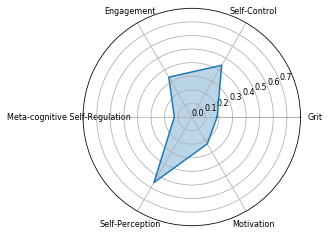

In [41]:
from math import pi

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles1 = [n / float(N)*2*pi for n in range(N)]


Learners_arrange['Persona_arrange1'] += Learners_arrange['Persona_arrange1'][:1]
angles1 += angles1[:1]

plt.polar(angles1, Learners_arrange['Persona_arrange1'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange1'], alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))


plt.show()

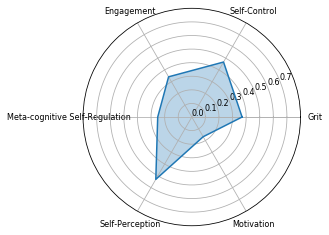

In [42]:
Learners_arrange['Persona_arrange2'] += Learners_arrange['Persona_arrange2'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange2'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange2'], alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))


plt.show()

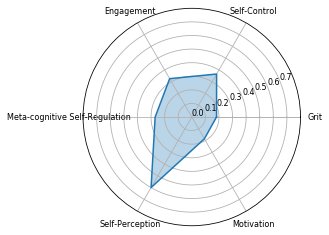

In [43]:
Learners_arrange['Persona_arrange3'] += Learners_arrange['Persona_arrange3'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange3'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange3'], alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))


plt.show()

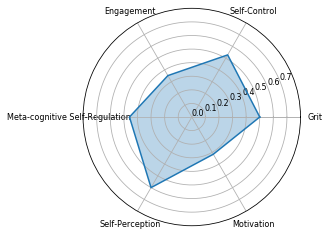

In [44]:
Learners_arrange['Persona_arrange4'] += Learners_arrange['Persona_arrange4'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange4'])
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange4'], alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.1))


plt.show()

In [45]:
df_Data_Point_scaled_noNaN.shape

(41, 43)

In [46]:
len(user)

41

In [47]:
df_survey = pd.read_excel("C2-t3.xlsx")
df_survey.shape

(74, 84)

In [48]:
df_non_cog = df_survey.iloc[:, :57]

In [49]:
df_non_cog.set_index('USER ID', inplace=True)

In [50]:
df_non_cog_no24539 = df_non_cog.loc[user, :]

In [51]:
df_non_cog_no24539.head()

,学习者非认知能力调查表 题1,学习者非认知能力调查表 题2,学习者非认知能力调查表 题3,学习者非认知能力调查表 题4,学习者非认知能力调查表 题5,学习者非认知能力调查表 题6,学习者非认知能力调查表 题7,学习者非认知能力调查表 题8,学习者非认知能力调查表 题9,学习者非认知能力调查表 题10,学习者非认知能力调查表 题11,学习者非认知能力调查表 题12,学习者非认知能力调查表 题13,学习者非认知能力调查表 题14,学习者非认知能力调查表 题15,学习者非认知能力调查表 题16,学习者非认知能力调查表 题17,学习者非认知能力调查表 题18,学习者非认知能力调查表 题19,学习者非认知能力调查表 题20,学习者非认知能力调查表 题21,学习者非认知能力调查表 题22,学习者非认知能力调查表 题23,学习者非认知能力调查表 题24,学习者非认知能力调查表 题25,学习者非认知能力调查表 题26,学习者非认知能力调查表 题27,学习者非认知能力调查表 题28,学习者非认知能力调查表 题29,学习者非认知能力调查表 题30,学习者非认知能力调查表 题31,学习者非认知能力调查表 题32,学习者非认知能力调查表 题33,学习者非认知能力调查表 题34,学习者非认知能力调查表 题35,学习者非认知能力调查表 题36,学习者非认知能力调查表 题37,学习者非认知能力调查表 题38,学习者非认知能力调查表 题39,学习者非认知能力调查表 题40,学习者非认知能力调查表 题41,学习者非认知能力调查表 题42,学习者非认知能力调查表 题43,学习者非认知能力调查表 题44,学习者非认知能力调查表 题45,学习者非认知能力调查表 题46,学习者非认知能力调查表 题47,学习者非认知能力调查表 题48,学习者非认知能力调查表 题49,学习者非认知能力调查表 题50,学习者非认知能力调查表 题51,学习者非认知能力调查表 题52,学习者非认知能力调查表 题53,学习者非认知能力调查表 题54,学习者非认知能力调查表 题55,学习者非认知能力调查表 题56
USER ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,2.0,4.0,4.0,3.0,3.0,2.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,5.0,3.0,5.0,6.0
24617,2.0,6.0,6.0,6.0,5.0,3.0,1.0,2.0,5.0,2.0,6.0,3.0,4.0,1.0,1.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,3.0,6.0,3.0,6.0,2.0,1.0,6.0,5.0,5.0,2.0,2.0,2.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,2.0
24587,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,1.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,2.0,6.0,6.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24770,1.0,4.0,4.0,4.0,5.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0
8976,1.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0


In [52]:
#Grit = 题4 - 题13
df_non_cog_no24539['Grit'] = df_non_cog_no24539.iloc[:, 3:13].sum(1) / len(df_non_cog_no24539.iloc[0, 3:13])

#Self-control = 题14 - 题25
df_non_cog_no24539['Self-control'] = df_non_cog_no24539.iloc[:, 13:25].sum(1) / len(df_non_cog_no24539.iloc[0, 13:25])

#Engagement = 题26 - 题32
df_non_cog_no24539['Engagement'] = df_non_cog_no24539.iloc[:, 25:32].sum(1) / len(df_non_cog_no24539.iloc[0, 25:32])

#Metacognitive Self-regulation = 题33 - 题43
df_non_cog_no24539['Metacognitive Self-regulation'] = df_non_cog_no24539.iloc[:, 32:43].sum(1) / len(df_non_cog_no24539.iloc[0, 32:43])

#Self-perception = 题44 - 题49
df_non_cog_no24539['Self-perception'] = df_non_cog_no24539.iloc[:, 43:49].sum(1) / len(df_non_cog_no24539.iloc[0, 43:49])

#Motivation = 题50 - 题56
df_non_cog_no24539['Motivation'] = df_non_cog_no24539.iloc[:, 49:56].sum(1) / len(df_non_cog_no24539.iloc[0, 49:56])


In [53]:
df_non_cog_no24539.head()

,学习者非认知能力调查表 题1,学习者非认知能力调查表 题2,学习者非认知能力调查表 题3,学习者非认知能力调查表 题4,学习者非认知能力调查表 题5,学习者非认知能力调查表 题6,学习者非认知能力调查表 题7,学习者非认知能力调查表 题8,学习者非认知能力调查表 题9,学习者非认知能力调查表 题10,学习者非认知能力调查表 题11,学习者非认知能力调查表 题12,学习者非认知能力调查表 题13,学习者非认知能力调查表 题14,学习者非认知能力调查表 题15,学习者非认知能力调查表 题16,学习者非认知能力调查表 题17,学习者非认知能力调查表 题18,学习者非认知能力调查表 题19,学习者非认知能力调查表 题20,学习者非认知能力调查表 题21,学习者非认知能力调查表 题22,学习者非认知能力调查表 题23,学习者非认知能力调查表 题24,学习者非认知能力调查表 题25,学习者非认知能力调查表 题26,学习者非认知能力调查表 题27,学习者非认知能力调查表 题28,学习者非认知能力调查表 题29,学习者非认知能力调查表 题30,学习者非认知能力调查表 题31,学习者非认知能力调查表 题32,学习者非认知能力调查表 题33,学习者非认知能力调查表 题34,学习者非认知能力调查表 题35,学习者非认知能力调查表 题36,学习者非认知能力调查表 题37,学习者非认知能力调查表 题38,学习者非认知能力调查表 题39,学习者非认知能力调查表 题40,学习者非认知能力调查表 题41,学习者非认知能力调查表 题42,学习者非认知能力调查表 题43,学习者非认知能力调查表 题44,学习者非认知能力调查表 题45,学习者非认知能力调查表 题46,学习者非认知能力调查表 题47,学习者非认知能力调查表 题48,学习者非认知能力调查表 题49,学习者非认知能力调查表 题50,学习者非认知能力调查表 题51,学习者非认知能力调查表 题52,学习者非认知能力调查表 题53,学习者非认知能力调查表 题54,学习者非认知能力调查表 题55,学习者非认知能力调查表 题56,Grit,Self-control,Engagement,Metacognitive Self-regulation,Self-perception,Motivation
USER ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,2.0,4.0,4.0,3.0,3.0,2.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,5.0,3.0,5.0,6.0,3.2,3.333333,2.857143,2.818182,2.666667,4.142857
24617,2.0,6.0,6.0,6.0,5.0,3.0,1.0,2.0,5.0,2.0,6.0,3.0,4.0,1.0,1.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,3.0,6.0,3.0,6.0,2.0,1.0,6.0,5.0,5.0,2.0,2.0,2.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,2.0,3.7,4.833333,4.142857,4.636364,5.833333,5.000000
24587,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,1.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,2.0,6.0,6.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.8,5.083333,3.857143,5.181818,2.000000,1.000000
24770,1.0,4.0,4.0,4.0,5.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.6,2.833333,3.571429,3.454545,4.000000,3.571429
8976,1.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.1,4.750000,4.571429,4.727273,5.000000,4.571429


In [54]:
six_df_non_cog_no24539 = df_non_cog_no24539.iloc[:, 56:]

In [55]:
six_df_non_cog_no24539.head()

,Grit,Self-control,Engagement,Metacognitive Self-regulation,Self-perception,Motivation
USER ID,,,,,,
24588,3.2,3.333333,2.857143,2.818182,2.666667,4.142857
24617,3.7,4.833333,4.142857,4.636364,5.833333,5.000000
24587,1.8,5.083333,3.857143,5.181818,2.000000,1.000000
24770,3.6,2.833333,3.571429,3.454545,4.000000,3.571429
8976,3.1,4.750000,4.571429,4.727273,5.000000,4.571429


In [56]:
six_df_non_cog_no24539.shape

(41, 6)

In [57]:
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,cluster
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.232139,0.394737,0.032278,0.026699,0.262156,0.262156,0.016005,0.016005,0.012898,0.000000,0.417213,0.419227,0.001419,0.152850,0.037383,0.034447,0.044444,0.150677,0.196717,0.188787,0.232143,0.261603,0.010345,0.702703,0.240000,0.216049,1.0,0.000392,0.000166,0.000326,0.051603,0.182516,0.225141,0.247505,0.279886,0.235446,0.265306,0.265306,0.000000,0.958904,-0.958337,0.513691,2
24617,0.005775,0.026316,1.000000,1.000000,0.427061,0.427061,1.000000,1.000000,0.129407,0.037975,0.107102,0.109095,0.003648,0.181347,0.143925,0.023008,0.133333,0.020881,0.031215,0.030881,0.005952,0.426160,0.127586,0.756757,0.360000,0.422840,0.0,0.006465,0.089999,1.000000,0.002945,0.018340,0.005601,0.403194,0.006805,0.420992,0.346939,0.346939,0.093396,1.000000,-1.607627,-1.103675,0
24587,0.000000,0.013645,0.940308,0.922961,0.382664,0.382664,0.248337,0.248337,0.077816,0.215190,0.318392,0.315036,0.001419,0.160622,0.057477,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.383966,0.075862,0.675676,0.400000,0.382716,0.0,1.000000,1.000000,0.062495,0.023862,0.000000,0.000000,0.361277,0.000000,0.378262,0.918367,0.918367,0.315347,0.917808,-1.732625,-0.375948,0
24770,0.016016,0.026316,0.089962,0.070452,0.393235,0.393235,0.331855,0.331855,0.170679,0.360759,0.147988,0.142668,0.003040,0.165803,0.035981,0.020694,0.088889,0.019175,0.049117,0.034016,0.015476,0.392405,0.168966,0.837838,0.800000,0.391975,0.0,0.002681,0.009166,0.111107,0.147884,0.034016,0.015533,0.371257,0.016128,0.388299,0.142857,0.142857,0.143861,0.917808,-1.175269,-0.711948,0
8976,0.277209,0.417154,0.013161,0.010316,0.380550,0.380550,0.331855,0.331855,0.154342,0.025316,0.082851,0.084368,0.205918,0.150259,0.178037,0.109640,0.088889,0.168621,0.254163,0.261731,0.277560,0.379747,0.151724,0.918919,0.666667,0.391975,1.0,0.004080,0.008264,0.111107,0.001636,0.274271,0.282712,0.359281,0.291232,0.381417,0.775510,0.775510,0.257721,0.917808,-0.693949,0.567264,2


In [58]:
df_Data_Point_scaled_noNaN_no24539 = df_Data_Point_scaled_noNaN

In [59]:
merge_non_cog = df_Data_Point_scaled_noNaN_no24539.merge(six_df_non_cog_no24539, left_index=True, right_index=True, how='left')
merge_non_cog

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,cluster,Grit,Self-control,Engagement,Metacognitive Self-regulation,Self-perception,Motivation
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24588,0.232139,0.394737,0.032278,0.026699,0.262156,0.262156,0.016005,0.016005,0.012898,0.000000,0.417213,0.419227,0.001419,0.152850,0.037383,0.034447,0.044444,0.150677,0.196717,0.188787,0.232143,0.261603,0.010345,0.702703,0.240000,0.216049,1.0,0.000392,0.000166,0.000326,5.160300e-02,0.182516,0.225141,0.247505,0.279886,0.235446,0.265306,0.265306,0.000000,0.958904,-0.958337,0.513691,2,3.2,3.333333,2.857143,2.818182,2.666667,4.142857
24617,0.005775,0.026316,1.000000,1.000000,0.427061,0.427061,1.000000,1.000000,0.129407,0.037975,0.107102,0.109095,0.003648,0.181347,0.143925,0.023008,0.133333,0.020881,0.031215,0.030881,0.005952,0.426160,0.127586,0.756757,0.360000,0.422840,0.0,0.006465,0.089999,1.000000,2.944506e-03,0.018340,0.005601,0.403194,0.006805,0.420992,0.346939,0.346939,0.093396,1.000000,-1.607627,-1.103675,0,3.7,4.833333,4.142857,4.636364,5.833333,5.000000
24587,0.000000,0.013645,0.940308,0.922961,0.382664,0.382664,0.248337,0.248337,0.077816,0.215190,0.318392,0.315036,0.001419,0.160622,0.057477,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.383966,0.075862,0.675676,0.400000,0.382716,0.0,1.000000,1.000000,0.062495,2.386192e-02,0.000000,0.000000,0.361277,0.000000,0.378262,0.918367,0.918367,0.315347,0.917808,-1.732625,-0.375948,0,1.8,5.083333,3.857143,5.181818,2.000000,1.000000
24770,0.016016,0.026316,0.089962,0.070452,0.393235,0.393235,0.331855,0.331855,0.170679,0.360759,0.147988,0.142668,0.003040,0.165803,0.035981,0.020694,0.088889,0.019175,0.049117,0.034016,0.015476,0.392405,0.168966,0.837838,0.800000,0.391975,0.0,0.002681,0.009166,0.111107,1.478842e-01,0.034016,0.015533,0.371257,0.016128,0.388299,0.142857,0.142857,0.143861,0.917808,-1.175269,-0.711948,0,3.6,2.833333,3.571429,3.454545,4.000000,3.571429
8976,0.277209,0.417154,0.013161,0.010316,0.380550,0.380550,0.331855,0.331855,0.154342,0.025316,0.082851,0.084368,0.205918,0.150259,0.178037,0.109640,0.088889,0.168621,0.254163,0.261731,0.277560,0.379747,0.151724,0.918919,0.666667,0.391975,1.0,0.004080,0.008264,0.111107,1.636347e-03,0.274271,0.282712,0.359281,0.291232,0.381417,0.775510,0.775510,0.257721,0.917808,-0.693949,0.567264,2,3.1,4.750000,4.571429,4.727273,5.000000,4.571429
24638,0.050369,0.013645,0.039144,0.047742,0.382664,0.382664,0.498891,0.498891,0.073517,0.177215,0.368807,0.365470,0.001419,0.152850,0.049533,0.010925,0.044444,0.030595,0.072489,0.039294,0.050000,0.383966,0.072414,0.702703,0.280000,0.391975,0.0,0.000689,0.000115,0.249996,4.458374e-02,0.039294,0.048851,0.361277,0.061625,0.382564,0.653061,0.653061,0.232143,0.917808,-1.447070,-0.355125,0,3.9,4.750000,3.000000,3.545455,1.000000,2.428571
24628,0.254108,0.372320,0.022614,0.018319,0.403805,0.403805,0.069370,0.069370,0.120378,0.341772,0.277202,0.280640,0.098703,0.150259,0.061682,0.058869,0.288889,0.168436,0.172744,0.223534,0.253571,0.405063,0.120690,0.756757,0.280000,0.425926,1.0,0.003883,0.000170,0.005097,6.041818e-02,0.223534,0.246449,0.381238,0.298333,0.409808,0.979592,0.979592,0.142461,0.917808,-0.834974,0.819037,2,3.0,3.833333,2.857143,3.727273,4.333333,1.571429
24615,0.120505,0.196881,0.049162,0.038816,0.384778,0.384778,1.000000,1.000000,0.242476,0.094937,0.062673,0.063592,0.060397,0.158031,0.226636,0.043830,0.111111,0.137638,0.129904,0.140245,0.120893,0.383966,0.241379,0.540541,0.746667,0.388889,1.0,1.000000,0.153119,1.000000,1.339751e-03,0.143380,0.120337,0.363273,0.123552,0.382277,0.836735,0.836735,0.256785,0.917808,-1.295991,0.234710,2,3.9,3.000000,3.000000,4.454545,5.166667,4.571429
24681,0.265420,0.371345,0.016846,0.013269,0.475687,0.475687,0.019570,0.019570,0.100602,0.335443,0.314804,0.296905,0.190312,0.152850,0.057944,0.099743,0.266667,0.186396,0.203058,0.233253,0.265476,0.476793,0.100000,0.7027

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



#Expert Engineering版
X_Grit_EE = merge_non_cog.loc[:, ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12']]
Y_Grit = merge_non_cog.loc[:, 'Grit']

X_Self_control_EE = merge_non_cog.loc[:, ['SC1', 'SC2', 'SC3', 'SC4', 'SC5', 'SC6', 'SC7']]
Y_Self_control = merge_non_cog.loc[:, 'Self-control']

X_Engagement_EE = merge_non_cog.loc[:, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']]
Y_Engagement = merge_non_cog.loc[:, 'Engagement']

X_Metacognitive_EE = merge_non_cog.loc[:, ['MSR1', 'MSR2']]
Y_Metacognitive = merge_non_cog.loc[:, 'Metacognitive Self-regulation']

X_Self_perception_EE = merge_non_cog.loc[:, ['SP1', 'SP2', 'SP3', 'SP4']]
Y_Self_perception = merge_non_cog.loc[:, 'Self-perception']

X_Motivation_EE = merge_non_cog.loc[:, ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']]
Y_Motivation = merge_non_cog.loc[:, 'Motivation']


#Exploratory Factor Analysis版
X_Grit_EFA = merge_non_cog.loc[:, ['G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4']]
X_Self_control_EFA = merge_non_cog.loc[:, ['SC2', 'SC5', 'MSR1', 'M9']]
X_Engagement_EFA = merge_non_cog.loc[:, ['G5', 'G11', 'E3', 'SP4', 'M3', 'M5']]
X_Metacognitive_EFA = merge_non_cog.loc[:, ['G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8']]
X_Self_perception_EFA = merge_non_cog.loc[:, ['E5', 'E6', 'M6', 'M7']]
X_Motivation_EFA = merge_non_cog.loc[:, ['G9', 'G12', 'SP3']]

In [61]:
#Grit: Linear Regression of EE
lin_reg_EE_G = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_G, X_Grit_EE, Y_Grit, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_G.fit(X_Grit_EE, Y_Grit)

print(lin_reg_EE_G.intercept_)
print(lin_reg_EE_G.coef_)
print(MSEs)
print(mean_MSE)

2.7282780257309
[-0.99297024  0.73801757  1.46517662 -2.50726591  1.26866287  1.26866287  0.16699621  0.16699621 -0.88802449 -0.87745474 -7.48732624  7.67428568]
[-806.33688117   -1.08833083   -2.95184174   -0.86828692   -2.14902472]
-162.67887307765096


In [62]:
#Grit: Linear Regression of EFA
lin_reg_EFA_G = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_G, X_Grit_EFA, Y_Grit, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_G.fit(X_Grit_EFA, Y_Grit)

print(lin_reg_EFA_G.intercept_)
print(lin_reg_EFA_G.coef_)
print(MSEs)
print(mean_MSE)

2.743108039011326
[ 2.98022141e+02  2.54493206e-01  5.92437028e+00 -7.44399616e+00  2.07152480e+00  2.62393903e-01  2.62393903e-01 -2.01261611e+00  1.00528477e+00 -8.71386944e-01  2.90435895e+00  6.53681692e+01 -3.63874580e+02 -1.28677319e-01 -7.70498397e+01  8.06309801e+01 -3.52221709e+00]
[-482.4111505    -1.18267163   -1.22165231   -0.81259844   -3.23858446]
-97.77333146963402


In [63]:
#Self-control: Linear Regression of EE
lin_reg_EE_SC = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_SC, X_Self_control_EE, Y_Self_control, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_SC.fit(X_Self_control_EE, Y_Self_control)

print(lin_reg_EE_SC.intercept_)
print(lin_reg_EE_SC.coef_)
print(MSEs)
print(mean_MSE)

3.700772101436687
[-2.64789903  1.40490995 -3.00934386  3.9788224  -1.37842087 -3.08864097  5.76836737]
[ -5.04287309  -2.80048768  -2.29908315  -6.15442152 -43.58798161]
-11.976969409439276


In [64]:
#Self-control: Linear Regression of EFA
lin_reg_EFA_SC = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_SC, X_Self_control_EFA, Y_Self_control, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_SC.fit(X_Self_control_EFA, Y_Self_control)

print(lin_reg_EFA_SC.intercept_)
print(lin_reg_EFA_SC.coef_)
print(MSEs)
print(mean_MSE)

2.8781189971957266
[ 2.17053353 -1.39657782 -0.07141961  0.83203093]
[ -0.75686168  -2.75905399  -1.3810586   -4.68134758 -52.86312616]
-12.488289604170774


In [65]:
#Engagement: Linear Regression of EE
lin_reg_EE_E = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_E, X_Engagement_EE, Y_Engagement, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_E.fit(X_Engagement_EE, Y_Engagement)

print(lin_reg_EE_E.intercept_)
print(lin_reg_EE_E.coef_)
print(MSEs)
print(mean_MSE)

3.2343980823072584
[ 15.59065833 -13.71533531   1.50365969  -2.83092798  -0.10292752   0.18844909]
[-0.34265121 -0.83447062 -3.71950479 -5.42654196 -8.1546937 ]
-3.695572455376592


In [66]:
#Engagement: Linear Regression of EFA
lin_reg_EFA_E = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_E, X_Engagement_EFA, Y_Engagement, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_E.fit(X_Engagement_EFA, Y_Engagement)

print(lin_reg_EFA_E.intercept_)
print(lin_reg_EFA_E.coef_)
print(MSEs)
print(mean_MSE)

3.0654790787989503
[ 63.55256904   0.6587948  -63.70446245  -1.14508134   1.2559155   -0.16915231]
[-4.50758360e-01 -9.03835847e-01 -6.63988532e-01 -4.35770859e+00 -2.56328410e+27]
-5.12656820643298e+26


In [67]:
#Metacognitive Self-regulation: Linear Regression of EE
lin_reg_EE_MSR = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_MSR, X_Metacognitive_EE, Y_Metacognitive, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_MSR.fit(X_Metacognitive_EE, Y_Metacognitive)

print(lin_reg_EE_MSR.intercept_)
print(lin_reg_EE_MSR.coef_)
print(MSEs)
print(mean_MSE)

3.253747908065368
[0.27916078 0.39281528]
[-0.95589452 -0.53892583 -0.75410811 -3.50374844 -1.55161786]
-1.4608589523986277


In [68]:
#Metacognitive Self-regulation: Linear Regression of EFA
lin_reg_EFA_MSR = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_MSR, X_Metacognitive_EFA, Y_Metacognitive, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_MSR.fit(X_Metacognitive_EFA, Y_Metacognitive)

print(lin_reg_EFA_MSR.intercept_)
print(lin_reg_EFA_MSR.coef_)
print(MSEs)
print(mean_MSE)

3.991722401274029
[-3.16767544 -7.51817626  7.67085815  0.2729952   1.85782526 -0.33439448]
[-0.36131732 -0.4288017  -0.48020488 -4.50298262 -4.3992709 ]
-2.0345154845735114


In [69]:
#Self-perception: Linear Regression of EE
lin_reg_EE_SP = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_SP, X_Self_perception_EE, Y_Self_perception, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_SP.fit(X_Self_perception_EE, Y_Self_perception)

print(lin_reg_EE_SP.intercept_)
print(lin_reg_EE_SP.coef_)
print(MSEs)
print(mean_MSE)

3.4660562296239648
[-0.3303622  -0.17060168  1.1692092  -0.24446437]
[-27.39465678  -2.98427202  -2.20788251  -7.47740244  -2.55353049]
-8.523548849762944


In [70]:
#Self-perception: Linear Regression of EFA
lin_reg_EFA_SP = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_SP, X_Self_perception_EFA, Y_Self_perception, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_SP.fit(X_Self_perception_EFA, Y_Self_perception)

print(lin_reg_EFA_SP.intercept_)
print(lin_reg_EFA_SP.coef_)
print(MSEs)
print(mean_MSE)

5.145406920108898
[-3.09472633  1.94259361 -0.48473348 -0.48473348]
[-2.87063036 -2.83660777 -1.98497588 -6.13246341 -2.05594046]
-3.1761235765906557


In [71]:
#Motivation: Linear Regression of EE
lin_reg_EE_M = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_M, X_Motivation_EE, Y_Motivation, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_M.fit(X_Motivation_EE, Y_Motivation)

print(lin_reg_EE_M.intercept_)
print(lin_reg_EE_M.coef_)
print(MSEs)
print(mean_MSE)

1.9163370519766816
[-7.49013094  8.21907436  8.9008868  -0.57839331 -8.28825424 -0.3064063  -0.3064063   1.56585176  1.73630438]
[ -2.51780045  -3.19486708  -2.70320942  -3.23170095 -35.1390161 ]
-9.357318800105231


In [72]:
#Motivation: Linear Regression of EFA
lin_reg_EFA_M = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_M, X_Motivation_EFA, Y_Motivation, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_M.fit(X_Motivation_EFA, Y_Motivation)

print(lin_reg_EFA_M.intercept_)
print(lin_reg_EFA_M.coef_)
print(MSEs)
print(mean_MSE)

4.302546821346708
[-1.28692728 -1.78457316  0.5943022 ]
[-2.43351571 -1.91433693 -0.66742274 -2.57652886 -3.91948456]
-2.3022577619619318


In [73]:
#Grit: Lasso Regression of EE
lasso_EE_G = Lasso(alpha=0.005)
lasso_EE_G.fit(X_Grit_EE, Y_Grit)
list(lasso_EE_G.coef_)

[-0.47893880262274435,
 -0.05110370733191564,
 -0.9356376303894286,
 -0.0,
 1.417773698830266,
 3.505230816467479e-15,
 0.08571834550428363,
 0.0,
 -0.6327967958454811,
 -0.8057655323848686,
 -0.0,
 -0.0]

In [74]:
#Grit: Lasso Regression of EFA
lasso_EFA_G = Lasso(alpha=0.005)
lasso_EFA_G.fit(X_Grit_EFA, Y_Grit)
list(lasso_EFA_G.coef_)


[0.0,
 -1.220959363206455,
 -1.0143034542767597,
 -0.0,
 0.8959075433777082,
 0.209140936104473,
 0.0,
 -1.2258541445110913,
 0.0,
 -0.0,
 0.30161740836069556,
 -0.0,
 0.0,
 -0.5370796120057029,
 -0.0,
 0.0,
 -0.0]

In [75]:
#Self-control: Lasso Regression of EE
lasso_EE_SC = Lasso(alpha=0.005)
lasso_EE_SC.fit(X_Self_control_EE, Y_Self_control)
list(lasso_EE_SC.coef_)

[-1.372456706530242,
 0.887194582518374,
 -2.7813669318012533,
 0.8021751705225536,
 -1.2291368421247175,
 -0.0,
 4.005038560103912]

In [76]:
#Self-control: Lasso Regression of EFA
lasso_EFA_SC = Lasso(alpha=0.005)
lasso_EFA_SC.fit(X_Self_control_EFA, Y_Self_control)
list(lasso_EFA_SC.coef_)

[1.5933404658361578, -1.2208764586767935, 0.0, 0.3979876579417881]

In [77]:
#Engagement: Lasso Regression of EE
lasso_EE_E = Lasso(alpha=0.005)
lasso_EE_E.fit(X_Engagement_EE, Y_Engagement)
list(lasso_EE_E.coef_)

[-0.0, -0.0, 1.4775491331541923, -0.7414355163942792, 0.0, 0.23224852151582215]

In [78]:
#Engagement: Lasso Regression of EFA
lasso_EFA_E = Lasso(alpha=0.005)
lasso_EFA_E.fit(X_Engagement_EFA, Y_Engagement)
list(lasso_EFA_E.coef_)

[0.0, 0.2298450197802784, 0.0, -0.7919910165363382, 0.5786703627839256, 0.0]

In [79]:
#Metacognitive Self-regulation: Lasso Regression of EE
lasso_EE_MSR = Lasso(alpha=0.005)
lasso_EE_MSR.fit(X_Metacognitive_EE, Y_Metacognitive)
list(lasso_EE_MSR.coef_)

[0.06494404860629799, 0.3529017124431876]

In [80]:
#Metacognitive Self-regulation: Lasso Regression of EFA
lasso_EFA_MSR = Lasso(alpha=0.005)
lasso_EFA_MSR.fit(X_Metacognitive_EFA, Y_Metacognitive)
list(lasso_EFA_MSR.coef_)

[-1.2928108374729719,
 -0.44539076191328203,
 -0.0,
 0.32772151044945713,
 1.5106817004594715,
 -0.22146810032242342]

In [81]:
#Self-perception: Lasso Regression of EE
lasso_EE_SP = Lasso(alpha=0.005)
lasso_EE_SP.fit(X_Self_perception_EE, Y_Self_perception)
list(lasso_EE_SP.coef_)

[-0.23108875885415103,
 -0.07396540336677025,
 1.064268251823618,
 -0.09813015052541295]

In [82]:
#Self-perception: Lasso Regression of EFA
lasso_EFA_SP = Lasso(alpha=0.005)
lasso_EFA_SP.fit(X_Self_perception_EFA, Y_Self_perception)
list(lasso_EFA_SP.coef_)

[-2.86199726879877, 1.801839858465717, -0.891403902538779, -0.0]

In [83]:
#Motivation: Lasso Regression of EE
lasso_EE_M = Lasso(alpha=0.005)
lasso_EE_M.fit(X_Motivation_EE, Y_Motivation)
list(lasso_EE_M.coef_)

[-0.736972347614175,
 0.0,
 1.0581350100104794,
 -0.0,
 -0.0,
 -0.4091537319139135,
 -9.322990368565261e-16,
 -0.0,
 -0.15147995056434516]

In [84]:
#Motivation: Lasso Regression of EE
lasso_EFA_M = Lasso(alpha=0.005)
lasso_EFA_M.fit(X_Motivation_EFA, Y_Motivation)
list(lasso_EFA_M.coef_)

[-1.1390181459704467, -1.5148883932762307, 0.5622823448055894]

In [85]:
listEE_G = lin_reg_EE_G.coef_.tolist()
listEE_SC = lin_reg_EE_SC.coef_.tolist()
listEE_E = lin_reg_EE_E.coef_.tolist()
listEE_MSR = lin_reg_EE_MSR.coef_.tolist()
listEE_SP = lin_reg_EE_SP.coef_.tolist()
listEE_M = lin_reg_EE_M.coef_.tolist()

coef_list_reg_EE = listEE_G + listEE_SC + listEE_E + listEE_MSR + listEE_SP + listEE_M

In [86]:
listEE_G2 = lasso_EE_G.coef_.tolist()
listEE_SC2 = lasso_EE_SC.coef_.tolist()
listEE_E2 = lasso_EE_E.coef_.tolist()
listEE_MSR2 = lasso_EE_MSR.coef_.tolist()
listEE_SP2 = lasso_EE_SP.coef_.tolist()
listEE_M2 = lasso_EE_M.coef_.tolist()

coef_list_lasso_EE = listEE_G2 + listEE_SC2 + listEE_E2 + listEE_MSR2 + listEE_SP2 + listEE_M2

In [87]:
listEFA_G = lin_reg_EFA_G.coef_.tolist()
listEFA_SC = lin_reg_EFA_SC.coef_.tolist()
listEFA_E = lin_reg_EFA_E.coef_.tolist()
listEFA_MSR = lin_reg_EFA_MSR.coef_.tolist()
listEFA_SP = lin_reg_EFA_SP.coef_.tolist()
listEFA_M = lin_reg_EFA_M.coef_.tolist()

coef_list_reg_EFA = listEFA_G + listEFA_SC + listEFA_E + listEFA_MSR + listEFA_SP + listEFA_M

In [88]:
listEFA_G2 = lasso_EFA_G.coef_.tolist()
listEFA_SC2 = lasso_EFA_SC.coef_.tolist()
listEFA_E2 = lasso_EFA_E.coef_.tolist()
listEFA_MSR2 = lasso_EFA_MSR.coef_.tolist()
listEFA_SP2 = lasso_EFA_SP.coef_.tolist()
listEFA_M2 = lasso_EFA_M.coef_.tolist()

coef_list_lasso_EFA = listEFA_G2 + listEFA_SC2 + listEFA_E2 + listEFA_MSR2 + listEFA_SP2 + listEFA_M2

In [89]:
EE_coef_table = pd.DataFrame(columns = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 
                                        'SC1', 'SC2', 'SC3', 'SC4', 'SC5', 'SC6', 'SC7', 
                                        'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 
                                        'MSR1', 'MSR2', 
                                        'SP1', 'SP2', 'SP3', 'SP4', 
                                        'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], index = ['Linear', 'LASSO'])
EE_coef_table.loc['Linear'] = coef_list_reg_EE
EE_coef_table.loc['LASSO'] = coef_list_lasso_EE

In [90]:
EE_coef_table

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
Linear,-0.99297,0.738018,1.46518,-2.50727,1.26866,1.26866,0.166996,0.166996,-0.888024,-0.877455,-7.48733,7.67429,-2.6479,1.40491,-3.00934,3.97882,-1.37842,-3.08864,5.76837,15.5907,-13.7153,1.50366,-2.83093,-0.102928,0.188449,0.279161,0.392815,-0.330362,-0.170602,1.16921,-0.244464,-7.49013,8.21907,8.90089,-0.578393,-8.28825,-0.306406,-0.306406,1.56585,1.7363
LASSO,-0.478939,-0.0511037,-0.935638,-0,1.41777,3.50523e-15,0.0857183,0,-0.632797,-0.805766,-0,-0,-1.37246,0.887195,-2.78137,0.802175,-1.22914,-0,4.00504,-0,-0,1.47755,-0.741436,0,0.232249,0.064944,0.352902,-0.231089,-0.0739654,1.06427,-0.0981302,-0.736972,0,1.05814,-0,-0,-0.409154,-9.32299e-16,-0,-0.15148


In [91]:
EFA_coef_table = pd.DataFrame(columns = ['G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4', 
                 'SC2', 'SC5', 'MSR1', 'M9', 
                 'G5', 'G11', 'E3', 'SP4', 'M3', 'M5', 
                 'G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8', 
                 'E5', 'E6', 'M6', 'M7', 
                 'G9', 'G12', 'SP3'], index = ['Linear', 'LASSO'])
EFA_coef_table.loc['Linear'] = coef_list_reg_EFA
EFA_coef_table.loc['LASSO'] = coef_list_lasso_EFA

In [92]:
EFA_coef_table

,G1,G2,G3,G4,G6,G7,G8,SC1,SC4,SC6,SC7,E1,E2,SP1,M1,M2,M4,SC2,SC5,MSR1,M9,G5,G11,E3,SP4,M3,M5,G10,SC3,E4,MSR2,SP2,M8,E5,E6,M6,M7,G9,G12,SP3
Linear,298.022,0.254493,5.92437,-7.444,2.07152,0.262394,0.262394,-2.01262,1.00528,-0.871387,2.90436,65.3682,-363.875,-0.128677,-77.0498,80.631,-3.52222,2.17053,-1.39658,-0.0714196,0.832031,63.5526,0.658795,-63.7045,-1.14508,1.25592,-0.169152,-3.16768,-7.51818,7.67086,0.272995,1.85783,-0.334394,-3.09473,1.94259,-0.484733,-0.484733,-1.28693,-1.78457,0.594302
LASSO,0,-1.22096,-1.0143,-0,0.895908,0.209141,0,-1.22585,0,-0,0.301617,-0,0,-0.53708,-0,0,-0,1.59334,-1.22088,0,0.397988,0,0.229845,0,-0.791991,0.57867,0,-1.29281,-0.445391,-0,0.327722,1.51068,-0.221468,-2.862,1.80184,-0.891404,-0,-1.13902,-1.51489,0.562282
